# Dhruv Patel
# 17162121014

# Practical 10 - CNN

In [2]:
## here we will working with MNSIT dataset
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [6]:
## load data

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
print(X_train.shape)  ## 60000 images of 28*28
print(X_test.shape)   ## 10000 images of 28*28

(60000, 28, 28)
(10000, 28, 28)


In [8]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [9]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [11]:
# type(y_train)

In [14]:
X_train = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(10000,28,28,1)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)  

In [16]:
y_train ## converted into categorical , one hot encoded format

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
## train our model

In [18]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,Dense

In [20]:
## build model

model = Sequential()
model.add(Conv2D(30,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(15,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))


In [21]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=["accuracy"])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 15)        4065      
_________________________________________________________________
flatten (Flatten)            (None, 8640)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                86410     
Total params: 90,775
Trainable params: 90,775
Non-trainable params: 0
_________________________________________________________________


In [24]:
m1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)  ## 1st model

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0761 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0933 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9927 - val_loss: 0.1073 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.1178 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.1572 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 0.1336 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9954 - val_loss: 0.1531 - val_accuracy:

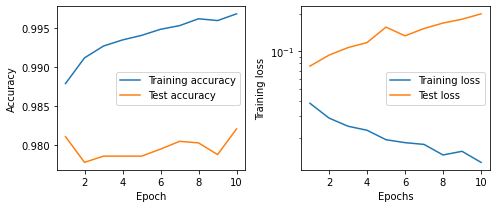

In [26]:
#Plot the train/test accuracy and train/test loss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
train_acc = m1.history['accuracy'];
test_acc = m1.history['val_accuracy'];

nepochs = len(train_acc);
sns.lineplot(x=np.arange(1,nepochs+1), y=train_acc, label='Training accuracy');
sns.lineplot(x=np.arange(1,nepochs+1), y=test_acc, label='Test accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');

plt.subplot(1,2,2)
train_loss = m1.history['loss']
test_loss = m1.history['val_loss']
sns.lineplot(x=np.arange(1,nepochs+1), y=train_loss, label='Training loss');
sns.lineplot(x=np.arange(1,nepochs+1), y=test_loss, label='Test loss');
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.tight_layout()

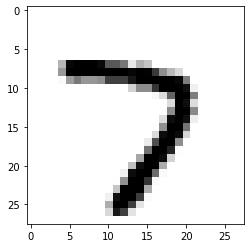

In [27]:
plt.imshow(X_test[17].reshape(28,28), cmap='binary');

In [32]:
# print(model.predict(X_test[[17]]))
print()
print('The number with max probability is')
print(np.argmax(model.predict(X_test[[17]])))


The number with max probability is
7


In [67]:
model2=Sequential()
model2.add(Conv2D(30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model2.add(Conv2D(15,kernel_size=(3,3),activation='relu'))
model2.add(Flatten())
model2.add(Dense(10,activation="softmax"))


In [68]:
model2.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=["accuracy"])


In [69]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        17344     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 15)        8655      
_________________________________________________________________
flatten_6 (Flatten)          (None, 7260)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                72610     
Total params: 98,909
Trainable params: 98,909
Non-trainable params: 0
_________________________________________________________________


In [71]:
m2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)  ## 2nd model

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9904 - val_loss: 0.0760 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.1091 - val_accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.1011 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.1065 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0163 - accuracy: 0.9953 - val_loss: 0.1131 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.9948 - val_loss: 0.1107 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.1233 - val_accuracy:

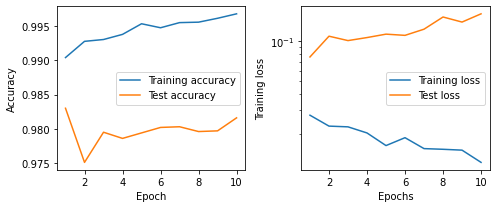

In [72]:
#Plot the train/test accuracy and train/test loss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
train_acc = m2.history['accuracy'];
test_acc = m2.history['val_accuracy'];

nepochs = len(train_acc);
sns.lineplot(x=np.arange(1,nepochs+1), y=train_acc, label='Training accuracy');
sns.lineplot(x=np.arange(1,nepochs+1), y=test_acc, label='Test accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');

plt.subplot(1,2,2)
train_loss = m2.history['loss']
test_loss = m2.history['val_loss']
sns.lineplot(x=np.arange(1,nepochs+1), y=train_loss, label='Training loss');
sns.lineplot(x=np.arange(1,nepochs+1), y=test_loss, label='Test loss');
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.tight_layout()

In [ ]:
## thus we tweaked first model and were able to get some slight improvement in accuracy